In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#IMPORT LIBRARY
import os
import zipfile
import shutil
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Define a function called "extract_zip" to extract your dataset (in case the dataset is in zip)
def extract_zip(file_path, extract_path):
    #Create a new folder if the extract folder is not exists before
    if not os.path.exists(extract_path):
      os.makedirs(extract_path)
      with zipfile.ZipFile(file_path, 'r') as zip_ref:
          zip_ref.extractall(extract_path)

In [ ]:
zip_file_dir = '/content/drive/MyDrive/Model Capstone/NewDataset_AlreadySplit.zip'
folder_target_to_extract = '/content/drive/MyDrive/Model Capstone/Dataset'

extract_zip(zip_file_dir, folder_target_to_extract)

In [ ]:
#Define dataset directory, train directory and test directory
dataset_dir = '/content/drive/MyDrive/Dataset faceu split'
train_dir = '/content/drive/MyDrive/Dataset faceu split/Train'
test_dir = '/content/drive/MyDrive/Dataset faceu split/Test'

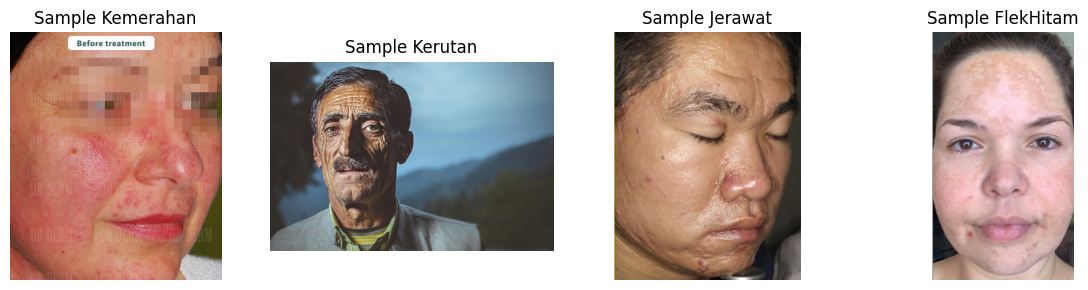

In [ ]:
#Show dataset sample from train dataset
#Initiate all directory in train folder
label_dirs = os.listdir(train_dir)

#initiate the figure and the axis to show the sample data images
fig, axs = plt.subplots(1, 4, figsize=(12, 3))

#Loop through all label directories and show 1 image for each label
for i, label_dir in enumerate(label_dirs):
    label_dir_path = os.path.join(train_dir, label_dir)
    image_files = os.listdir(label_dir_path)
    image_path = os.path.join(label_dir_path, image_files[0])
    image = Image.open(image_path)
    axs[i].imshow(image)
    axs[i].set_title(f'Sample {os.listdir(train_dir)[i]}')
    axs[i].axis('off')

# Show figure
plt.tight_layout()
plt.show()

In [ ]:
#initiate total width, total height and total images to find the average width and height
total_width = 0
total_height = 0
total_images = 0

#loop through the train and test folder to iterate all of the images
for folder_name in ["Train", "Test"]:
    folder_path = os.path.join(dataset_dir, folder_name)
    if os.path.isdir(folder_path):
        #
        for label_folder in os.listdir(folder_path):
            label_folder_path = os.path.join(folder_path, label_folder)
            if os.path.isdir(label_folder_path):
                # Loop through each label folder inside the "train" or "test" folder
                for image_file in os.listdir(label_folder_path):
                    image_path = os.path.join(label_folder_path, image_file)
                    if os.path.isfile(image_path):
                        # Open image using PIL
                        image = Image.open(image_path)
                        # take the image shape
                        width, height = image.size
                        # sum it into the total
                        total_width += width
                        total_height += height
                        total_images += 1

#divide the total width and height with total images to get the average value
average_width = total_width // total_images
average_height = total_height // total_images

#show the average value of all images width and height
print("Rata-rata ukuran citra:")
print("Lebar:", average_width)
print("Tinggi:", average_height)

SPLIT DATASET

In [ ]:
dataset_path = './Dataset/'
train_path = './NewDataset_AlreadySplit/Train/'
test_path = './NewDataset_AlreadySplit/Test/'

In [ ]:
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

In [ ]:
for label_folder in os.listdir(dataset_path):
    label_folder_path = os.path.join(dataset_path, label_folder)
    train_label_folder_path = os.path.join(train_path, label_folder)
    test_label_folder_path = os.path.join(test_path, label_folder)

    os.makedirs(train_label_folder_path, exist_ok=True)
    os.makedirs(test_label_folder_path, exist_ok=True)

    images = os.listdir(label_folder_path)

    if len(images) == 0:
        continue

    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    for image in train_images:
        src_path = os.path.join(label_folder_path, image)
        dest_path = os.path.join(train_label_folder_path, image)
        shutil.move(src_path, dest_path)

    for image in test_images:
        src_path = os.path.join(label_folder_path, image)
        dest_path = os.path.join(test_label_folder_path, image)
        shutil.move(src_path, dest_path)